In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

* 임의적 데이터셋 수정 사항
1. 프랑스, 핀란드 개도국(developing)으로 오분류 -> developed 변경
2. Population, Infant death 데이터에 오류가 너무 많아서 분석에서 제외
3. 미국 Adult Mortality 2007 ~ 2015 데이터가 이전 데이터보다 비정상적 감소폭을 보여 10의 자리 숫자 미기입 오타라고 판단 -> 임의 수정
...
Kaggle discussion을 참고

In [6]:
df = pd.read_csv('/content/Life Expectancy.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [8]:
df.shape

(2938, 22)

In [9]:
df_dropped = df.drop(columns=['infant deaths', 'Population'])
df_dropped.head()

,Country,Year,Status,Life expectancy,Adult Mortality,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,18.2,18.2,0.454,9.5


In [10]:
df_dropped.duplicated().value_counts()

,count
False,2938


In [11]:
null_values = df_dropped.isnull().sum()
print(null_values)

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


In [12]:
# Impute null values with the mean of their respective columns for only numeric data
numeric_columns = df_dropped.select_dtypes(include=['float64', 'int64']).columns
df_dropped[numeric_columns] = df_dropped[numeric_columns].fillna(df_dropped[numeric_columns].mean())

# Verify if null values are imputed
null_values_after_imputation = df_dropped.isnull().sum()

# Display the result
null_values_after_imputation

,0
Country,0
Year,0
Status,0
Life expectancy,0
Adult Mortality,0
Alcohol,0
percentage expenditure,0
Hepatitis B,0
Measles,0
BMI,0


In [13]:
df_dropped.head()

,Country,Year,Status,Life expectancy,Adult Mortality,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,18.2,18.2,0.454,9.5


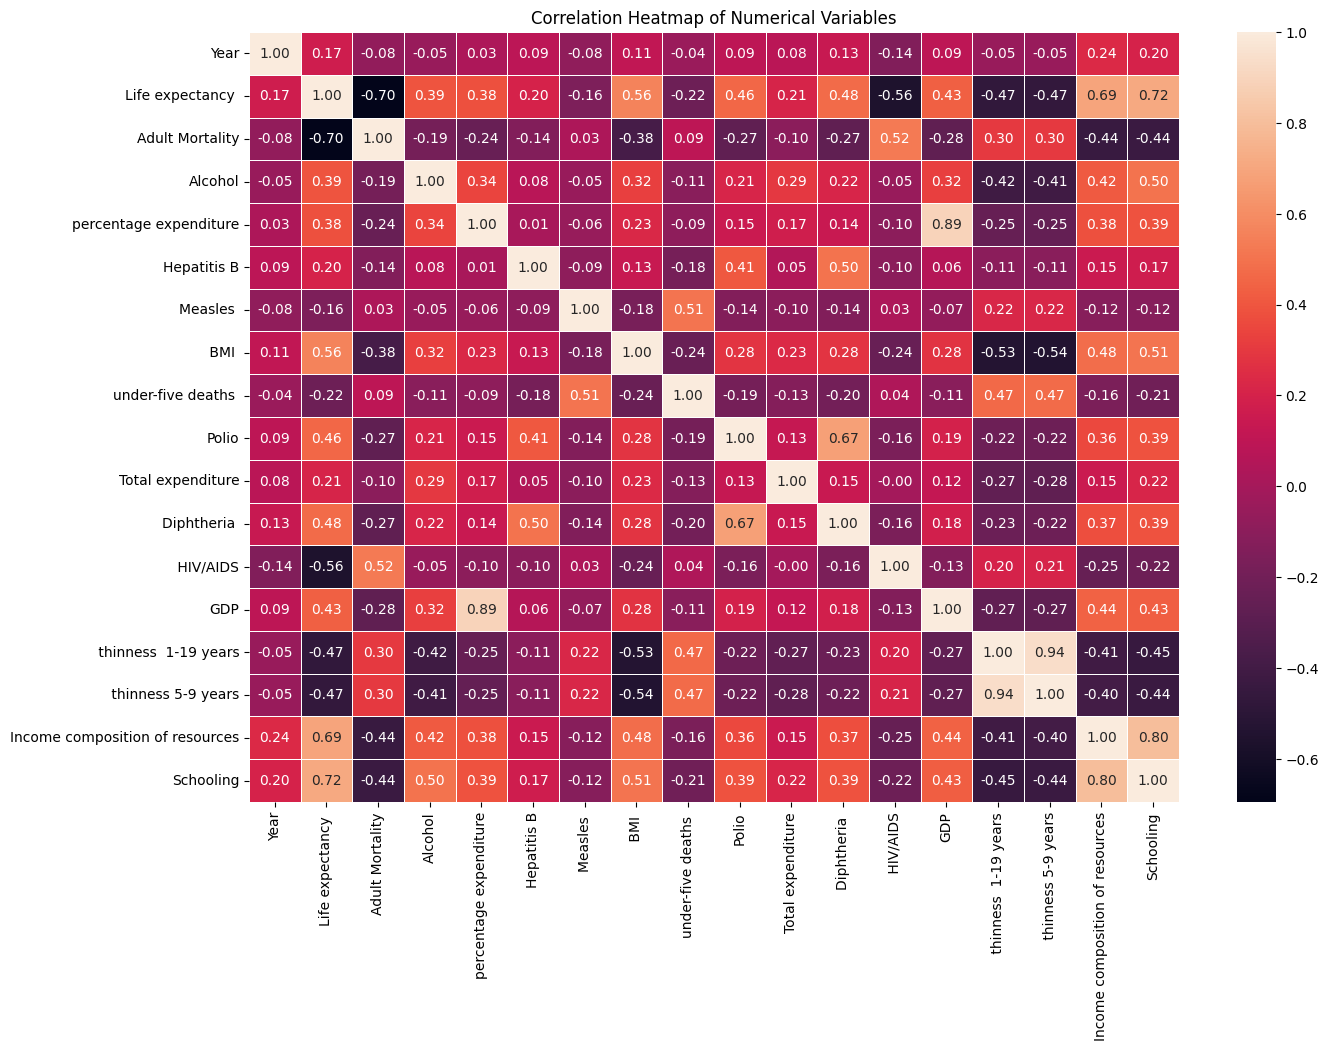

In [14]:
# 비숫자형 데이터 드랍
numeric_data = df_dropped.select_dtypes(include=['float64', 'int64'])

# 상관계수 계산
correlation_matrix = numeric_data.corr()

# 히트맵 생성
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

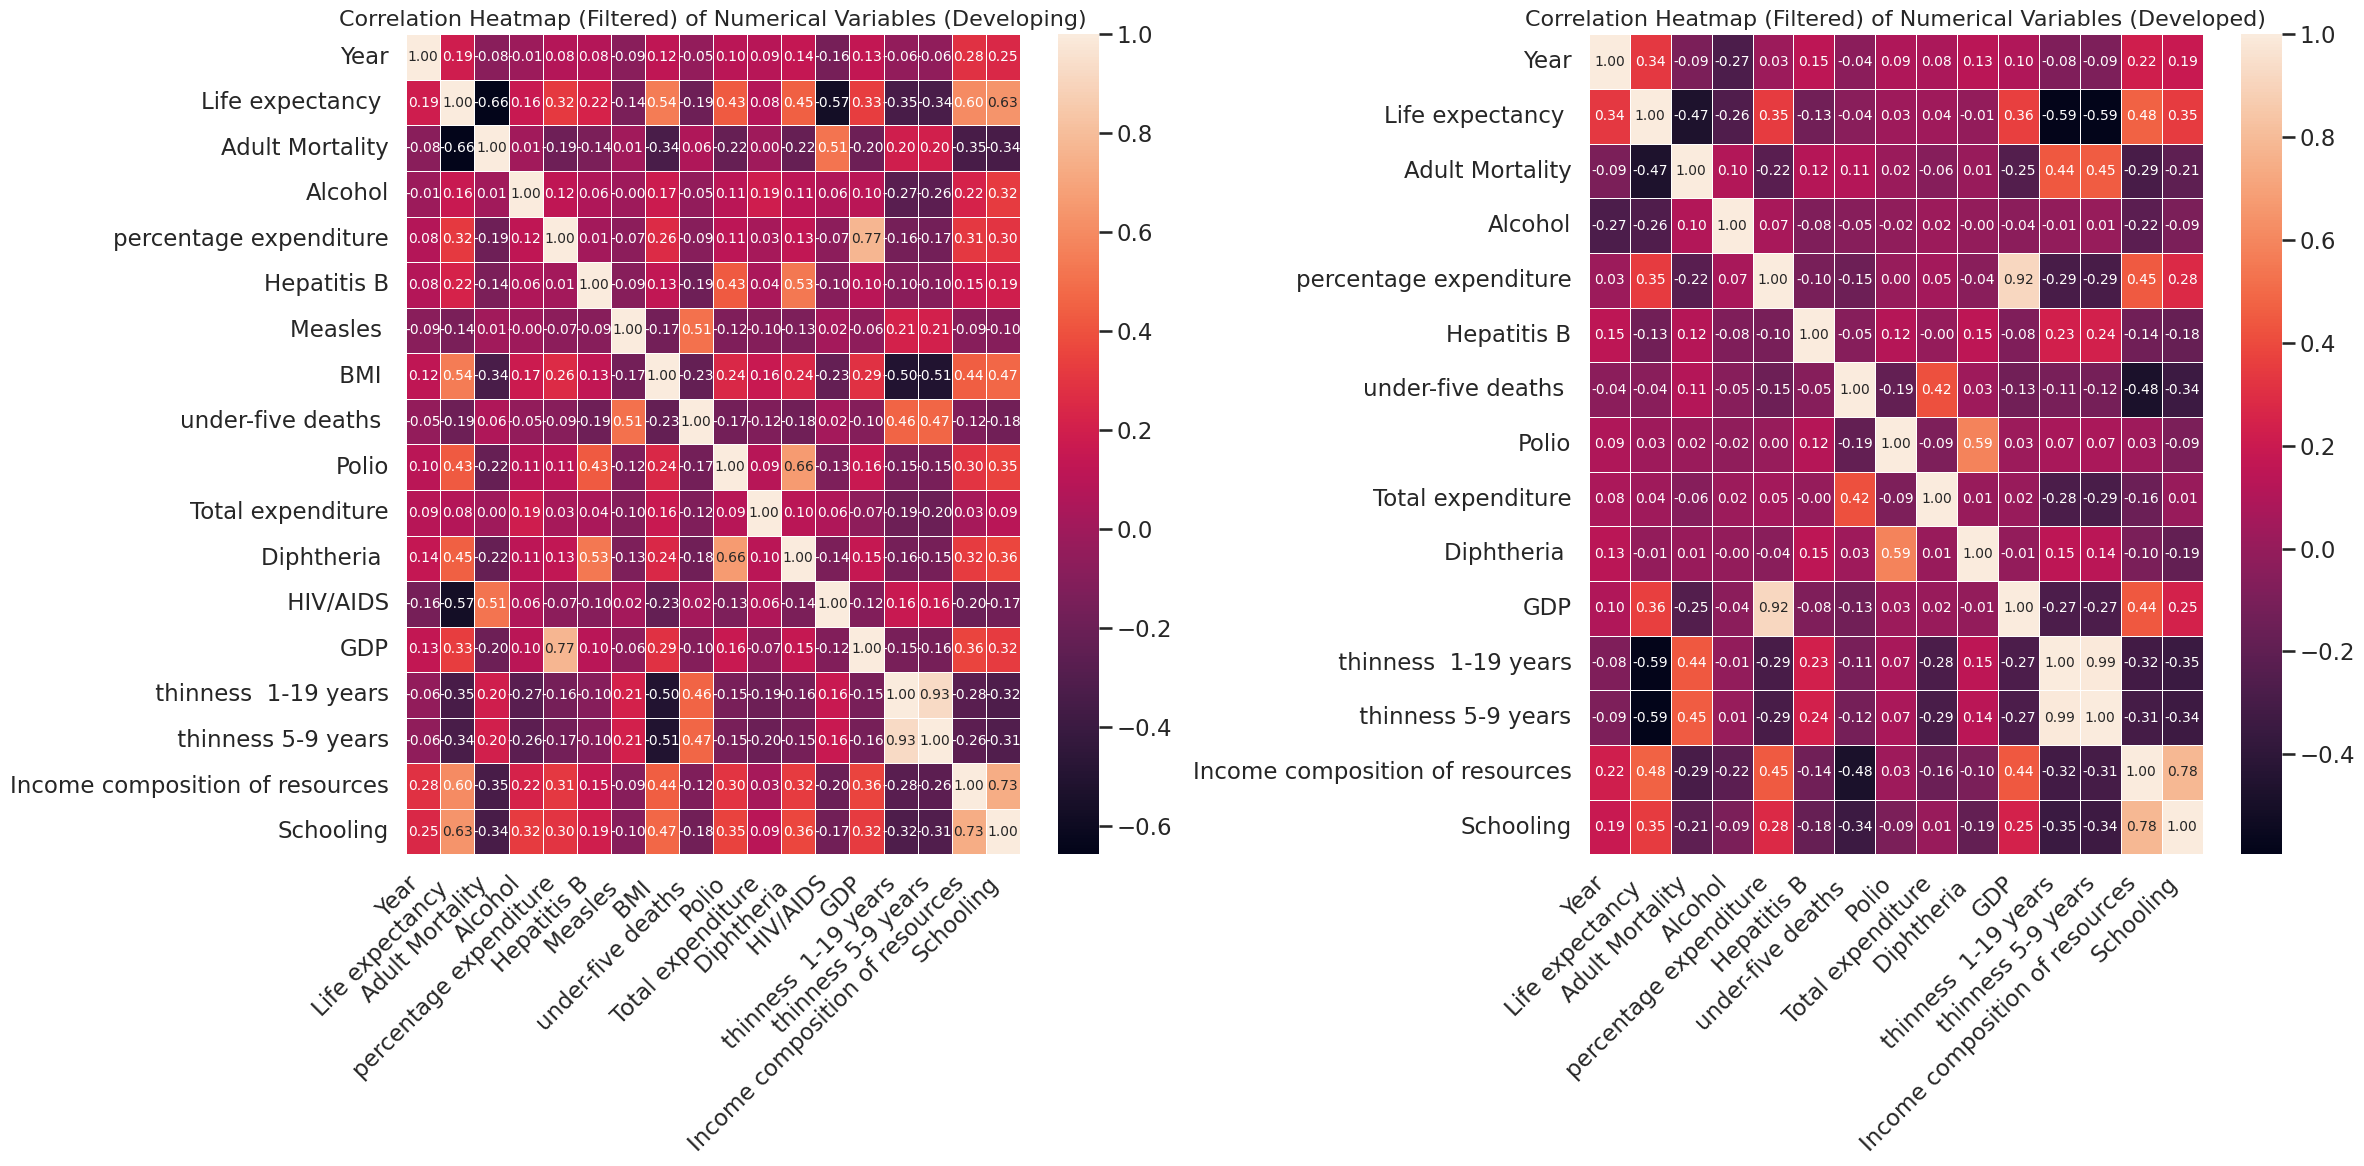

In [28]:
# 데이터셋 불러오기
df = pd.read_csv('/content/Life Expectancy.csv')

# 오류 많은 변수 제거
df_dropped = df.drop(columns=['infant deaths', 'Population'])

# 평균으로 결측치 대체
numeric_columns = df_dropped.select_dtypes(include=['float64', 'int64']).columns
df_dropped[numeric_columns] = df_dropped[numeric_columns].fillna(df_dropped[numeric_columns].mean())

# 개도국, 선진국 구별
developing_data = df_dropped[df_dropped['Status'] == 'Developing']
developed_data = df_dropped[df_dropped['Status'] == 'Developed']

# 비숫자 데이터 삭제
developing_numeric = developing_data.select_dtypes(include=['float64', 'int64'])
developed_numeric = developed_data.select_dtypes(include=['float64', 'int64'])

# 상관계수 미미한 변수 필터링 함수
def filter_low_correlation(data):
    corr_matrix = data.corr()
    to_remove = []
    for column in corr_matrix.columns:
        max_corr = corr_matrix[column].drop(column).abs().max()
        if max_corr < 0.2:
            to_remove.append(column)
    return data.drop(columns=to_remove)

# 필터링 함수 적용
developing_filtered = filter_low_correlation(developing_numeric)
developed_filtered = filter_low_correlation(developed_numeric)

# ' HIV/AIDS' 제거
if ' HIV/AIDS' in developed_filtered.columns:
    developed_filtered = developed_filtered.drop(columns=[' HIV/AIDS'])

# 상관계수 계산
developing_correlation_matrix_filtered = developing_filtered.corr()
developed_correlation_matrix_filtered = developed_filtered.corr()

# 개도국, 선진국 상관계수 히트맵
plt.figure(figsize=(24, 12))

plt.subplot(1, 2, 1)
sns.heatmap(developing_correlation_matrix_filtered, annot=True, fmt=".2f", linewidths=0.5, annot_kws={"size": 10},)
plt.title('Correlation Heatmap (Filtered) of Numerical Variables (Developing)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.subplot(1, 2, 2)
sns.heatmap(developed_correlation_matrix_filtered, annot=True, fmt=".2f", linewidths=0.5, annot_kws={"size": 10},)
plt.title('Correlation Heatmap (Filtered) of Numerical Variables (Developed)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/relational.py:433: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(x=x, y=y, **kws)
/usr/local/lib/python3.10/dist-packages/seaborn/relational.py:433: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(x=x, y=y, **kws)


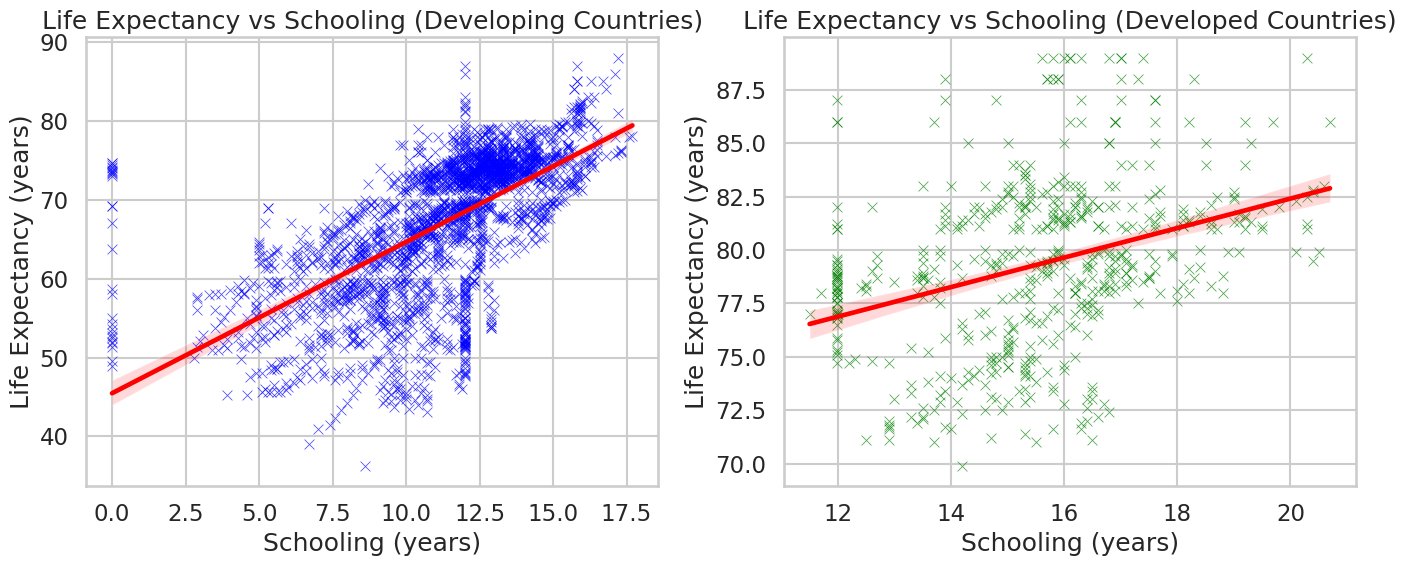

In [24]:
plt.figure(figsize=(14, 6))

# 개발도상국
plt.subplot(1, 2, 1)
sns.scatterplot(x='Schooling', y='Life expectancy ', data=developing_data,
                color='blue', marker='x', s=50, edgecolor='w', alpha=0.7)
sns.regplot(x='Schooling', y='Life expectancy ', data=developing_data, scatter=False, color='red')
plt.title('Life Expectancy vs Schooling (Developing Countries)')
plt.xlabel('Schooling (years)')
plt.ylabel('Life Expectancy (years)')

# 선진국
plt.subplot(1, 2, 2)
sns.scatterplot(x='Schooling', y='Life expectancy ', data=developed_data,
                color='green', marker='x', s=50, edgecolor='w', alpha=0.7)
sns.regplot(x='Schooling', y='Life expectancy ', data=developed_data, scatter=False, color='red')
plt.title('Life Expectancy vs Schooling (Developed Countries)')
plt.xlabel('Schooling (years)')
plt.ylabel('Life Expectancy (years)')

plt.tight_layout()
plt.show()

In [19]:
# T-test
from scipy.stats import ttest_ind

# 오류 변수 제거
df_dropped = df.drop(columns=['infant deaths', 'Population'])

# 결측치 평균 대체
numeric_columns = df_dropped.select_dtypes(include=['float64', 'int64']).columns
df_dropped[numeric_columns] = df_dropped[numeric_columns].fillna(df_dropped[numeric_columns].mean())

# 선진국, 개도국 분류
developing_data = df_dropped[df_dropped['Status'] == 'Developing']
developed_data = df_dropped[df_dropped['Status'] == 'Developed']

# Schooling, Life expectancy 추출
developing_schooling = developing_data['Schooling']
developing_life_expectancy = developing_data['Life expectancy ']
developed_schooling = developed_data['Schooling']
developed_life_expectancy = developed_data['Life expectancy ']

# T-test
t_stat_developing, p_value_developing = ttest_ind(developing_schooling, developing_life_expectancy)
t_stat_developed, p_value_developed = ttest_ind(developed_schooling, developed_life_expectancy)

# 상관계수
corr_developing = developing_data[['Schooling', 'Life expectancy ']].corr().iloc[0, 1]
corr_developed = developed_data[['Schooling', 'Life expectancy ']].corr().iloc[0, 1]

(t_stat_developing, p_value_developing, t_stat_developed, p_value_developed, corr_developing, corr_developed)


(-291.41953252512116,
 0.0,
 -337.70575367703765,
 0.0,
 0.6347976765250459,
 0.3494886809987192)